In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from skimage.io import imread, imshow
import cv2
import os
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix,classification_report,roc_auc_score

## <span style='color:red'> Train img read

In [2]:
labels_df = pd.read_csv('train.csv')

# Create a set of all the image IDs that you want to use
image_ids = set(labels_df['Image'])

# Create a dictionary to map the image IDs to the labels
labels_dict = labels_df.set_index('Image').to_dict()['Category']

In [3]:
# Extract Features from original Images for train img 
path = "NewWBpics/"
img_data = []
img_labels = []
for file in os.listdir(path):
    if file.endswith(".jpg"):
        # Get the ID of the image from the file name
        image_id = file.replace("BloodImage_","").replace(".jpg","") #remove the prefix 
        # remove leading zeroes
        image_id = str(int(image_id))
        image_id = int(image_id)

        if image_id in image_ids:
            # Load the image
            img = cv2.imread(os.path.join(path, file))
            img=img.reshape(-1)
            print(img)
            #img = cv2.resize(img, (256,256)) # resizing the image
            img_data.append(img)
            # Get the label for the image
            label = labels_dict.get(image_id, None)
            img_labels.append(label)


[176 154 143 ... 168 127 195]
[174 155 128 ... 208 204 199]
[188 193 184 ... 198 203 206]
[172 143 159 ... 196 204 193]
[183 190 183 ... 183 162 177]
[182 190 179 ... 198 203 202]
[176 163 165 ... 184 154 159]
[181 189 178 ... 193 192 202]
[173 145 144 ... 182 152 141]
[175 146 142 ... 183 143 144]
[186 191 182 ... 177 162 166]
[178 191 183 ... 198 203 206]
[179 191 179 ... 181 152 155]
[171 159 155 ... 202 208 189]
[188 172 155 ... 211 208 203]
[163 135 135 ... 189 165 175]
[163 132 129 ... 194 188 205]
[169 142 158 ... 181 148 155]
[166 135 138 ... 200 206 213]
[181 187 186 ... 187 153 147]
[179 156 154 ... 183 142 140]
[185 187 188 ... 201 202 198]
[150 137 151 ... 192 208 191]
[187 188 179 ... 188 148 176]
[177 191 189 ... 204 206 200]
[169 138 139 ... 201 203 197]
[166 183 174 ... 172 143 136]
[165 141 135 ... 174 141 132]
[168 137 144 ... 194 199 202]
[177 151 167 ... 196 205 192]
[179 187 177 ... 177 144 141]
[158 127 134 ... 199 206 199]
[169 146 144 ... 196 187 207]
[184 190 1

In [4]:
original_df=pd.DataFrame(img_data)

In [5]:
original_df

,0,1,2,3,4,5,6,7,8,9,...,921590,921591,921592,921593,921594,921595,921596,921597,921598,921599
0,-80,-102,-113,-80,-102,-113,-80,-102,-113,-80,...,-76,-96,121,-73,-93,122,-67,-88,127,-61
1,-82,-101,-128,-83,-103,-128,-87,-105,-128,-88,...,-36,-38,-43,-44,-45,-50,-53,-48,-52,-57
2,-68,-63,-72,-69,-64,-73,-70,-65,-74,-70,...,-48,-57,-52,-49,-57,-52,-49,-58,-53,-50
3,-84,-113,-97,-86,-115,-99,-89,-118,-103,-91,...,-58,-57,-49,-60,-59,-51,-62,-60,-52,-63
4,-73,-66,-73,-74,-67,-74,-74,-67,-74,-75,...,-76,-75,-97,-79,-74,-96,-78,-73,-94,-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-69,-69,-75,-70,-70,-76,-73,-72,-76,-74,...,-54,-54,-54,-54,-57,-56,-52,-58,-57,-53
218,-93,-124,-109,-91,-122,-107,-90,-122,-103,-90,...,-62,-59,-73,-72,-68,-85,-82,-76,-93,-90
219,-80,-73,-86,-79,-72,-85,-78,-71,-84,-77,...,-56,-64,-74,-57,-65,-75,-58,-65,-75,-58
220,-92,-111,-90,-90,-109,-90,-91,-107,-89,-90,...,-60,-56,-54,-60,-56,-54,-60,-56,-54,-60


## <span style='color:red'> Test img read

In [24]:
labels_df = pd.read_csv('test.csv')

# Create a set of all the image IDs that you want to use
image_ids = set(labels_df['Image'])

# Create a dictionary to map the image IDs to the labels
#labels_dict = labels_df.set_index('Image').to_dict()['Category']

In [25]:
# Extract Features from original Images for test img 
path = "NewWBpics/"
img_data = []
#img_labels = []
for file in os.listdir(path):
    if file.endswith(".jpg"):
        # Get the ID of the image from the file name
        image_id = file.replace("BloodImage_","").replace(".jpg","") #remove the prefix 
        # remove leading zeroes
        image_id = str(int(image_id))
        image_id = int(image_id)

        if image_id in image_ids:
            # Load the image
            img = cv2.imread(os.path.join(path, file))
            img=img.reshape(-1)
            print(img)
            #img = cv2.resize(img, (256,256)) # resizing the image
            img_data.append(img)
            # Get the label for the image
            #label = labels_dict.get(image_id, None)
            #img_labels.append(label)

[179 186 181 ... 185 154 163]
[179 174 165 ... 188 185 164]
[183 190 175 ... 205 205 205]
[167 171 166 ... 177 164 156]
[180 177 172 ... 193 181 171]
[160 136 130 ... 193 181 179]
[179 189 183 ... 176 145 136]
[180 192 180 ... 188 172 203]
[203 191 203 ... 172 139 174]
[179 191 185 ... 198 188 178]
[183 188 191 ... 204 193 195]
[178 192 181 ... 172 136 130]
[176 194 177 ... 194 205 197]
[175 157 158 ... 196 205 202]
[166 135 126 ... 198 197 199]
[171 151 156 ... 203 199 198]
[185 185 173 ... 198 202 196]
[182 183 179 ... 210 204 205]
[183 165 206 ... 182 150 155]
[185 186 182 ... 194 199 198]
[157 133 141 ... 191 174 195]
[161 134 150 ... 204 204 188]
[182 181 177 ... 199 195 184]
[166 144 169 ... 199 200 196]
[159 131 120 ... 198 199 197]
[180 183 167 ... 202 198 174]
[178 185 182 ... 181 160 182]
[164 140 148 ... 196 199 197]
[155 134 142 ... 197 196 198]
[187 188 172 ... 168 139 165]
[175 144 147 ... 185 152 159]
[155 134 133 ... 200 201 197]
[184 190 171 ... 201 207 190]
[184 186 1

In [26]:
test_df=pd.DataFrame(img_data)
test_df

,0,1,2,3,4,5,6,7,8,9,...,921590,921591,921592,921593,921594,921595,921596,921597,921598,921599
0,-77,-70,-75,-77,-70,-75,-77,-70,-75,-77,...,-92,-71,-102,-93,-71,-102,-93,-71,-102,-93
1,-77,-82,-91,-87,-92,-101,-95,-104,-108,-100,...,-74,-58,-59,-80,-63,-66,-87,-68,-71,-92
2,-73,-66,-81,-75,-68,-83,-75,-68,-83,-75,...,-51,-51,-50,-52,-51,-51,-51,-51,-51,-51
3,-89,-85,-90,-83,-79,-84,-75,-71,-76,-69,...,-98,-78,-90,-100,-79,-92,-100,-79,-92,-100
4,-76,-79,-84,-74,-77,-82,-74,-75,-79,-72,...,-77,-62,-73,-81,-62,-74,-84,-63,-75,-85
5,-96,-120,-126,-96,-120,-126,-96,-121,-125,-96,...,-71,-59,-71,-73,-62,-74,-76,-63,-75,-77
6,-77,-67,-73,-76,-66,-72,-76,-67,-70,-75,...,-119,-76,-105,-119,-78,-109,-118,-80,-111,-120
7,-76,-64,-76,-77,-65,-77,-79,-65,-77,-79,...,-56,-70,-86,-55,-69,-85,-54,-68,-84,-53
8,-53,-65,-53,-54,-66,-54,-59,-68,-58,-63,...,-85,-81,-115,-84,-84,-117,-83,-84,-117,-82
9,-77,-65,-71,-78,-66,-72,-78,-66,-72,-78,...,-73,-54,-62,-75,-56,-66,-76,-58,-68,-78


In [7]:
# 0:NEUTROPHIL | 1:EOSINOPHIL | 2:LYMPHOCYTE | 3:MONOCYTE
img_labels=pd.Series(img_labels).replace(('NEUTROPHIL','EOSINOPHIL','LYMPHOCYTE','MONOCYTE'),(0,1,2,3))

In [9]:
img_labels.value_counts()

0    140
1     52
2     18
3     12
dtype: int64

In [12]:
#variable
X=original_df
y=img_labels

In [14]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y)

In [17]:
#model
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.6


In [18]:
#lets analyze the Performance using F1 score
from sklearn.metrics import f1_score
# Calculate the F1-score for each class
f1_scores = f1_score(y_test, y_pred, average=None)

# Calculate the mean F1-score
mean_f1_score = f1_score(y_test, y_pred, average='micro')

print("Mean F1-score:", mean_f1_score)
print("F1-scores per class:", f1_scores)

Mean F1-score: 0.6
F1-scores per class: [0.74285714 0.14285714 0.         0.        ]


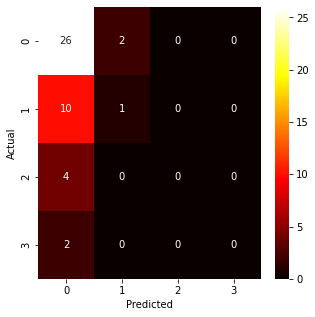

              precision    recall  f1-score   support

           0       0.62      0.93      0.74        28
           1       0.33      0.09      0.14        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.60        45
   macro avg       0.24      0.25      0.22        45
weighted avg       0.47      0.60      0.50        45



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# lets analyze the Performance using Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'hot', fmt = '.8g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

## submission

In [27]:
pred=model.predict(test_df)

In [28]:
pred=pd.Series(pred).replace((0,1,2,3),('NEUTROPHIL','EOSINOPHIL','LYMPHOCYTE','MONOCYTE'))

In [56]:
ids = list(image_ids)

In [57]:
ids.sort()

In [58]:
final_pred = pd.DataFrame()

In [59]:
final_pred["Image"] =ids
final_pred["Category"] = pred

In [60]:
final_pred

,Image,Category
0,7,NEUTROPHIL
1,9,NEUTROPHIL
2,17,NEUTROPHIL
3,18,NEUTROPHIL
4,26,NEUTROPHIL
5,35,NEUTROPHIL
6,37,LYMPHOCYTE
7,42,EOSINOPHIL
8,49,NEUTROPHIL
9,56,EOSINOPHIL


In [61]:
final_pred.to_csv('sample_submission(1).csv', index=False)